In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
daily=pd.read_csv("../data/cleaned/daily_activity_cleaned.csv")
sleep=pd.read_csv("../data/cleaned/sleep_data_cleaned.csv")
hourly=pd.read_csv("../data/cleaned/hourly_steps_cleaned.csv")

In [22]:
daily['ActivityDate']=pd.to_datetime(daily['ActivityDate'])
sleep['SleepDay']=pd.to_datetime(sleep['SleepDay'])

#  average steps per day

In [23]:
daily[['TotalSteps']].describe()

,TotalSteps
count,940.000000
mean,7637.910638
std,5087.150742
min,0.000000
25%,3789.750000
50%,7405.500000
75%,10727.000000
max,36019.000000


In [24]:
user_avg_steps=(daily.groupby('Id')['TotalSteps'].mean().reset_index())


# categorize users by activity level

In [25]:
def activity_level(steps):
    if steps < 5000:
        return 'Low'
    elif steps < 10000:
        return 'Moderate'
    else:
        return 'High'

In [26]:
user_avg_steps['ActivityLevel']=user_avg_steps['TotalSteps'].apply(activity_level)

# count users per category

In [27]:
user_avg_steps['ActivityLevel'].value_counts()

ActivityLevel
Moderate    18
Low          8
High         7
Name: count, dtype: int64

### Activity Level Insights

When users are categorized based on their average daily steps, the majority of Bellabeat users fall into the moderate activity category, followed by low and high activity users. This indicates that most users engage in a reasonable level of daily movement but may benefit from motivation to increase consistency or intensity.

From a business perspective, Bellabeat can focus on moderate-activity users by encouraging small behavioral improvements, while also creating targeted nudges for low-activity users to improve engagement and retention.


# SLEEP VS ACTIVITY RELATIONSHIP

# combined dataset

In [28]:
activity_sleep = pd.merge(daily,sleep,left_on=['Id','ActivityDate'],right_on=['Id','SleepDay'],how='inner')

In [29]:
activity_sleep.shape

(413, 19)

# Average sleep duration

In [30]:
activity_sleep['TotalMinutesAsleep'].describe()

count    413.000000
mean     419.467312
std      118.344679
min       58.000000
25%      361.000000
50%      433.000000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64

In [31]:
activity_sleep[['TotalSteps','TotalMinutesAsleep']].corr()

,TotalSteps,TotalMinutesAsleep
TotalSteps,1.000000,-0.186866
TotalMinutesAsleep,-0.186866,1.000000


<Axes: title={'center': 'Steps vs Sleep Duration'}, xlabel='TotalSteps', ylabel='TotalMinutesAsleep'>

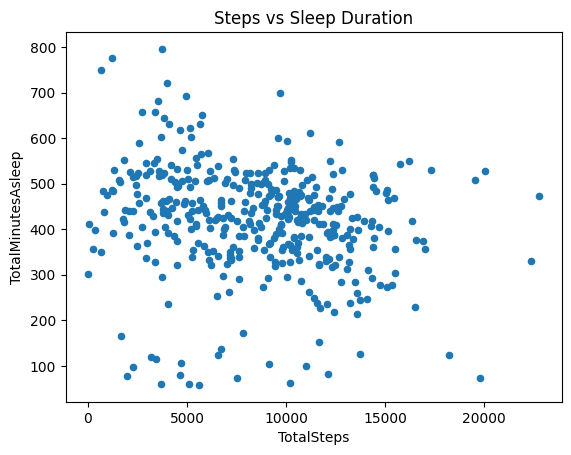

In [32]:

activity_sleep.plot(x='TotalSteps',y='TotalMinutesAsleep',kind='scatter',title='Steps vs Sleep Duration')

### Sleep and Activity Relationship

The correlation between total daily steps and total minutes asleep is weak and slightly negative, indicating that higher physical activity does not necessarily correspond to longer sleep duration. The scatter plot shows wide variation in step counts across similar sleep durations, suggesting that sleep behavior is influenced by factors beyond daily activity levels alone.

From a business perspective, this insight implies that Bellabeat should not assume increased physical activity automatically leads to better sleep. Instead, sleep-focused features and recommendations should be designed independently, emphasizing sleep quality, consistency, and recovery rather than activity volume alone.


# WEEKDAY VS WEEKEND BEHAVIOR
# Add day type

In [33]:
daily['DayOfWeek']=daily['ActivityDate'].dt.day_name()
daily['DayType']=daily['ActivityDate'].dt.weekday.apply(lambda x:'Weekend' if x>=5 else 'Weekday')

In [34]:
daily.groupby('DayType')['TotalSteps'].mean()

DayType
Weekday    7668.699281
Weekend    7550.571429
Name: TotalSteps, dtype: float64

<Axes: title={'center': 'Average Steps : Weekday vs Weekend'}, xlabel='DayType', ylabel='Average Steps'>

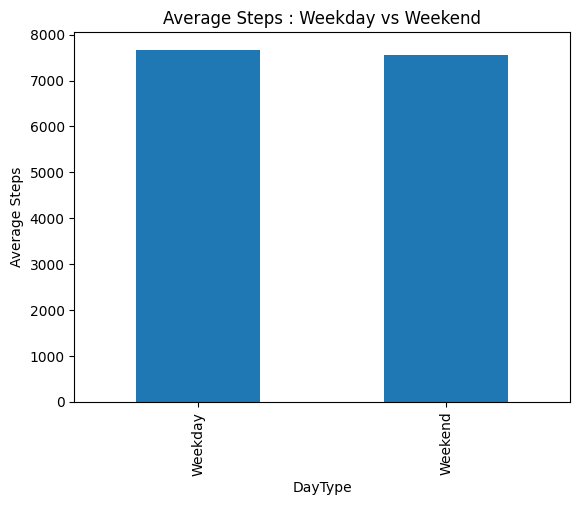

In [35]:
daily.groupby('DayType')['TotalSteps'].mean().plot(kind='bar',title='Average Steps : Weekday vs Weekend',ylabel='Average Steps')


Both the data from weekend and weekday are approximately same.only negligible differences are found

# HOURLY USAGE PATTERNS

In [36]:
hourly_avg=(hourly.groupby('Hour')['StepTotal'].mean().reset_index())

<Axes: title={'center': 'Average Steps by Hour of Day'}, xlabel='Hour of Day', ylabel='Average Steps'>

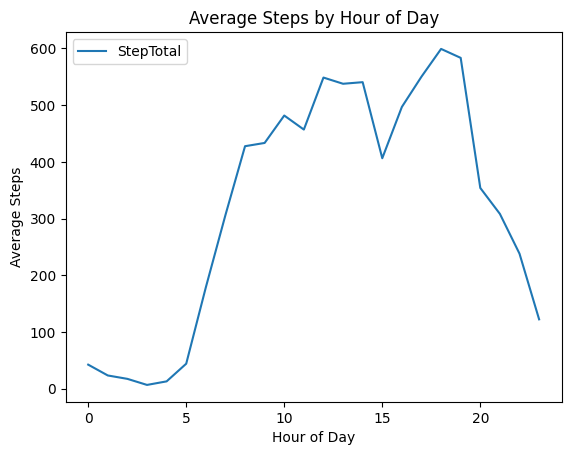

In [38]:
hourly_avg.plot(x='Hour',y='StepTotal',kind='line',title='Average Steps by Hour of Day',xlabel='Hour of Day',ylabel='Average Steps')

evengings saw a high activity peek,morning commutes are lowest 
should 
Bussiness prepesctive set reminders on evening as it is the user prefered commute hour 
and avoid reminders on late-night hours